In [ ]:
项目说明:
做一份电影数据分析，通过对2018全年的电影数据获取进行分析和探索。

探索的问题:
1).票房最高的电影Top10
2).人气最高的电影Top
3).性价比最好的电影(根据价格，时长和口碑指数)
4).统计每个月有多少上映的电影数量，找出淡季和旺季

数据说明:
tushare 这个库可以非常方便的获取每个月电影数据，然后大家合成2018整年的数据
月度票房
获取单月电影票房数据，默认为上一月，可输入月份参数获取指定月度的数据。
参数说明：
date:年月(YYYY-MM),默认为上一月
返回值说明：
Irank 排名
MovieName 电影名称
WomIndex 口碑指数
avgboxoffice 平均票价
avgshowcount 场均人次
box_pro 月度占比
boxoffice 单月票房(万)
days 月内天数
releaseTime 上映日期

In [2]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def get_tushare_data(data):
    '''获取tushare月度票房数据'''
    df = ts.month_boxoffice(data)
    return df
data = ['2018-10','2018-9','2018-8','2018-7','2018-6','2018-5','2018-4','2018-3','2018-2','2018-1']
rm = []
for i in data:
    df = get_tushare_data(i)
    rm.append(df)
res = pd.concat(rm, axis=0, ignore_index=True)#合并所有月份数据
df = pd.DataFrame(res)#转换dataframe
df.head(2)

,Irank,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,1,无双,7.84,36,15,32.1,116872,31,2018-09-30
1,2,影,7.40,36,13,15.3,55895,31,2018-09-30


In [3]:
df.dtypes

Irank           object
MovieName       object
WomIndex        object
avgboxoffice    object
avgshowcount    object
box_pro         object
boxoffice       object
days            object
releaseTime     object
dtype: object

In [4]:
df.fillna(value=0)
df.drop(['Irank'],axis=1,inplace=True)#删除无用的列
df=df[ ~ df['MovieName'].str.contains('其他')] #删除电影名称含其他的行
df=df[ ~ df['releaseTime'].str.contains('2017')]#删除含2017年的数据
df.head(2)

,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,无双,7.84,36,15,32.1,116872,31,2018-09-30
1,影,7.40,36,13,15.3,55895,31,2018-09-30


In [6]:
df = df.convert_objects(convert_numeric=True)#转换列的单据类型
df.dtypes

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


MovieName        object
WomIndex        float64
avgboxoffice      int64
avgshowcount      int64
box_pro         float64
boxoffice         int64
days              int64
releaseTime      object
dtype: object

In [17]:
#票房最高的电影Top10
df_sum = df.groupby(['MovieName'],as_index = False)['boxoffice'].sum()
df_top = df_sum.sort_values(['boxoffice'],ascending=False)
df_top.rename(columns={'MovieName':'电影名称','boxoffice':'单月票房(万)'}, inplace = True)
df_top_ten = df_top.head(10)
df_top_ten = df_top_ten.set_index('电影名称')
df_top.head(2)

,电影名称,单月票房(万)
58,红海行动,359928
14,唐人街探案2,339240


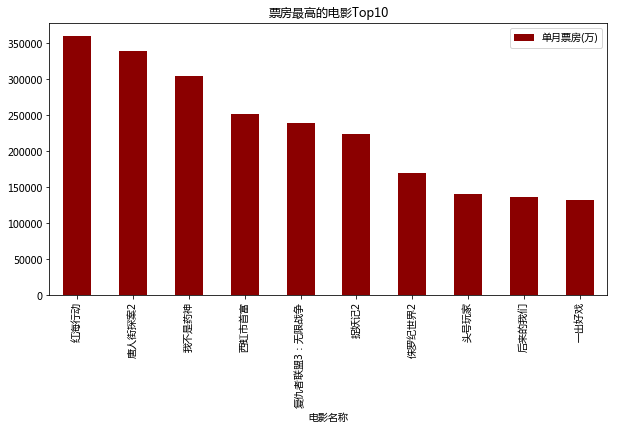

In [8]:
import matplotlib
matplotlib.matplotlib_fname()
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
mpl.rcParams['axes.unicode_minus'] = False   
plt = df_top_ten.plot(kind='bar',title='票房最高的电影Top10',figsize=(10,5),color="darkred")

In [ ]:
一、结论：2018票房最高的电影是《红海行动》

In [9]:
#人气最高的电影Top10
df_people = df.groupby(['MovieName'],as_index = False)['avgshowcount'].sum()
df_people_top = df_people.sort_values(['avgshowcount'],ascending=False)
df_people_top.head(10)
df_people_top.rename(columns={'MovieName':'电影名称','avgshowcount':'场均人次'}, inplace = True)
df_people_top_ten = df_people_top.head(10)
df_people_top_ten = df_people_top_ten.set_index('电影名称')
df_people_top_ten.head(10)

,场均人次
电影名称,
红海行动,75
唐人街探案2,71
西虹市首富,68
捉妖记2,65
后来的我们,61
头号玩家,59
碟中谍6：全面瓦解,47
李茶的姑妈,39
影,38


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBD1908>],
      dtype=object)

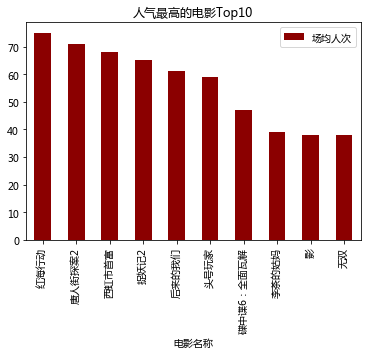

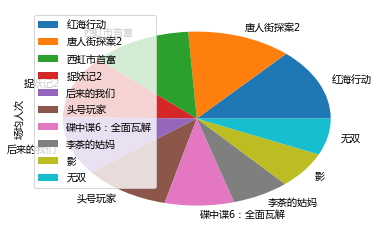

In [10]:
#人气最高的电影Top10
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
mpl.rcParams['axes.unicode_minus'] = False   
plt = df_people_top_ten.plot(kind='bar',title='人气最高的电影Top10',color="darkred")
df_people_top_ten.plot.pie(subplots=True)

In [ ]:
二、结论：人气最高的电影《红海行动》

In [11]:
#性价比最好的电影(根据价格，时长和口碑指数)
best_list = df.loc[:,['MovieName','WomIndex','avgboxoffice','releaseTime']]
best_list.head(2)
best_list.dtypes

MovieName        object
WomIndex        float64
avgboxoffice      int64
releaseTime      object
dtype: object

In [12]:
#电影口碑指数前十
best_list1 = best_list.groupby(['MovieName'],as_index = False)['WomIndex'].max()
best_list1 = best_list.sort_values(['WomIndex'],ascending=False)
new_list =best_list1.head(10)
new_list.head(10)

,MovieName,WomIndex,avgboxoffice,releaseTime
106,奇迹男孩,8.93,30,2018-01-19
101,神秘巨星,8.85,30,2018-01-19
93,神秘巨星,8.82,31,2018-01-19
33,我不是药神,8.81,35,2018-07-05
89,红海行动,8.52,41,2018-02-16
30,碟中谍6：全面瓦解,8.21,36,2018-08-31
62,巴霍巴利王2：终结,8.13,31,2018-05-04
107,公牛历险记,8.13,32,2018-01-19
48,复仇者联盟3：无限战争,8.11,36,2018-05-11
88,唐人街探案2,8.05,39,2018-02-16


In [13]:
#性价比最好的电影(根据价格/口碑指数)
from pyecharts import Bar
attr = new_list['MovieName']
v1 = new_list['WomIndex']
v2 = new_list['avgboxoffice']
bar = Bar("性价比最好的电影(根据价格/口碑指数)")
bar.add("口碑指数", attr, v1, is_stack=True)
bar.add("价格指数", attr, v2, is_stack=True)
bar

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "E:\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [ ]:
三、结论：性价比最好的电影(根据价格/口碑指数)也是《红海行动》

In [14]:
#4).统计每个月有多少上映的电影数量，找出淡季和旺季
df.head()

,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,无双,7.84,36,15,32.1,116872,31,2018-09-30
1,影,7.40,36,13,15.3,55895,31,2018-09-30
2,李茶的姑妈,6.05,35,14,13.6,49530,31,2018-09-30
3,找到你,7.49,32,9,7.3,26685,27,2018-10-05
4,胖子行动队,5.53,34,11,6.3,22817,31,2018-09-30


In [15]:
def splittime(timecol):
    '''把releasetime分割抽取出月份'''
    return str(timecol.split('-')[1])
df['month'] = df['releaseTime'].apply(splittime)
df['month'].head()
df_month = df.groupby(['month'],as_index = False)['MovieName'].count()
df_month = df_month.sort_values(['month'],ascending=True)
df_month.head(12)

,month,MovieName
0,01,10
1,02,10
2,03,10
3,04,11
4,05,8
5,06,11
6,07,9
7,08,10
8,09,13
9,10,5


In [16]:
#4).统计每个月有多少上映的电影数量，找出淡季和旺季
from pyecharts import Bar
attr = df_month['month']
v1 = df_month['MovieName']
bar = Bar("每月上映电影数量")
bar.add("", attr , v1 , is_more_utils=True )
bar

四、结论：9月份是电影的旺季，10月份是相对的淡季（有部分是数据缺失，11月12月份的数据缺失）